# Translation from Octave ex2- Logistic regression - Machine learning coursera-

In [1]:
import numpy as np

In [61]:
data = np.loadtxt('./data/ex2data1.txt',delimiter=',')

In [62]:
X, y = data[:,0:2], data[:,2:]

In [63]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [5]:
import matplotlib.pyplot as plt

##  ==================== Part 1: Plotting ====================
 We start the exercise by first plotting the data to understand the  the problem we are working with.

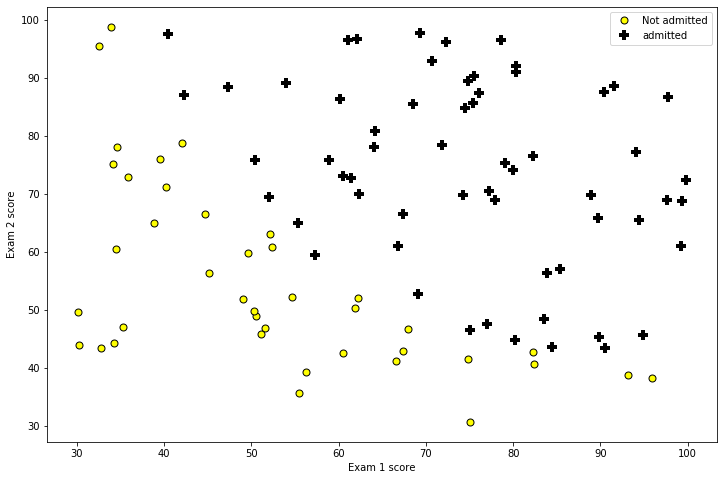

In [70]:
plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'Not admitted')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'admitted')
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score');

## ============ Part 2: Compute Cost and Gradient ============
In this part of the exercise, you will implement the cost and gradient for logistic regression.

In [7]:
def sigmoid(z):
    expval = np.exp(-z)
    g = 1./(1+expval)
    return g

In [8]:
def cost_function(theta, X, y):
    m = len(y);
    H = sigmoid(X@theta)
    J =  (-1/m)*((y.transpose()@np.log(H))+((1-y.transpose())@np.log(1-H)))
    D = H - y
    grad = (1/m)*X.transpose()@D
    return J.item(), grad

In [64]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X_init = np.hstack((np.ones((m,1)),X))

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

In [10]:
# Compute and display initial cost and gradient
cost, grad = cost_function(initial_theta,X_init,y)
print('Cost at initial theta (zeros): {:f}'.format(cost));
print('Expected cost (approx): 0.693');
print('Gradient at initial theta (zeros):');
print('{}'.format(grad));
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [11]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]]);
cost, grad = cost_function(test_theta, X_init, y);

print('Cost at test theta: {}'.format(cost))
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print('{}'.format(grad))
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta: 0.2183301938265977
Expected cost (approx): 0.218
Gradient at test theta:
[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



In [12]:
grad.flatten()

array([0.04290299, 2.56623412, 2.64679737])

## ============= Part 3: Optimizing using fminunc  =============
In this exercise, you will use a built-in function (fmin_bfgs) to find the optimal parameters theta.

In [13]:
import scipy.optimize as opt

In [14]:
def func(theta, X, y):
    theta = theta.reshape(len(theta),1)
    #print(theta.shape)
    cost, _ = cost_function(theta,X, y )
    return cost

def funcprime(theta, X, y):
    theta = theta.reshape(len(theta),1)
    #print(theta.shape)
    _, grad = cost_function(theta,X, y )
    return grad.flatten()

In [15]:
func(test_theta, X_init, y)

0.2183301938265977

In [16]:
funcprime(test_theta, X_init, y)

array([0.04290299, 2.56623412, 2.64679737])

In [17]:
theta_results = opt.fmin_bfgs(func, initial_theta,fprime=funcprime, args=(X_init, y),full_output=True, maxiter=400)
theta_min = theta_results[0]
cost = theta_results[1]

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


C:\Local\localenv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Local\localenv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in matmul
  after removing the cwd from sys.path.


In [18]:
print('Cost at theta found by fminunc: {}'.format(cost))
print('Expected cost (approx): 0.203')
print('theta:');
print('{}'.format(theta_min))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201\n')

Cost at theta found by fminunc: 0.20349770158944375
Expected cost (approx): 0.203
theta:
[-25.16133284   0.2062317    0.2014716 ]
Expected theta (approx):
 -25.161
 0.206
 0.201



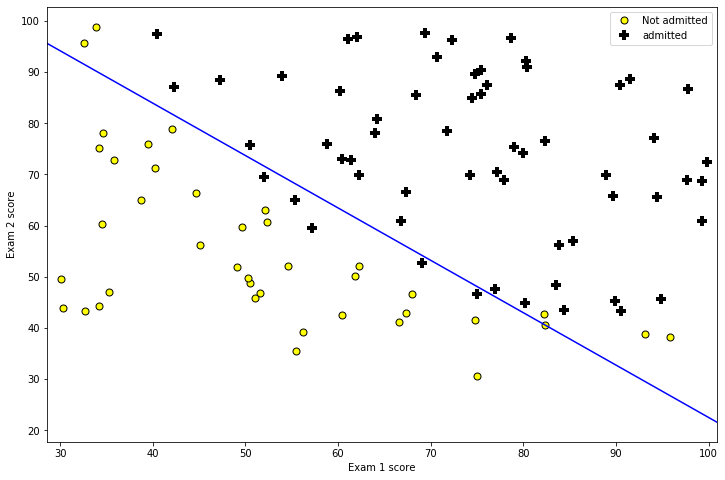

In [19]:
plt.figure(figsize=(12,8))
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'Not admitted')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'admitted')

plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
plot_y = (-1./theta_min[2])*(theta_min[1]*plot_x + theta_min[0])
plt.plot(plot_x,plot_y,'b-')
plt.xlim(min(plot_x),max(plot_x))
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score');

## ============== Part 4: Predict and Accuracies ==============
  After learning the parameters, you'll like to use it to predict the outcomes
  on unseen data. In this part, you will use the logistic regression model
  to predict the probability that a student with score 45 on exam 1 and 
  score 85 on exam 2 will be admitted.

  Furthermore, you will compute the training and test set accuracies of 
  our model.

  Your task is to complete the code in predict.m

  Predict probability for a student with score 45 on exam 1 
  and score 85 on exam 2 

In [20]:
def predict(theta, X):
    p_index = sigmoid(X@theta) >= 0.5
    p = p_index.astype(int)
    return p

In [21]:
sigmoid([1,45,85] @ theta_min)

0.776290724058894

In [22]:
prob = sigmoid([1,45,85] @ theta_min);
print('For a student with scores 45 and 85, we predict an admission probability of {}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n\n');

# Compute accuracy on our training set
p = predict(theta_min, X_init);

print('Train Accuracy: {}'.format(np.mean((p == y.flatten())) * 100))
print('Expected accuracy (approx): 89.0')

For a student with scores 45 and 85, we predict an admission probability of 0.776290724058894
Expected value: 0.775 +/- 0.002


Train Accuracy: 89.0
Expected accuracy (approx): 89.0


## Extra: Using sklearn kit

In [23]:
from sklearn.linear_model import LogisticRegression 

In [65]:
clf_LR = LogisticRegression(C=1e42, penalty='l2',tol=0.001,solver="lbfgs")

In [66]:
clf_LR.fit(X,np.ravel(y))

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [67]:
clf_LR.predict(X)

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

In [68]:
theta_min_sklearn = np.append(clf_LR.intercept_,clf_LR.coef_)

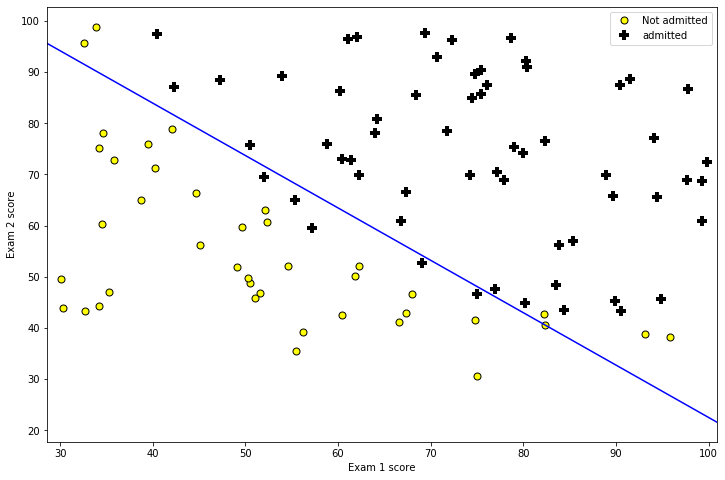

In [71]:
plt.figure(figsize=(12,8))
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'Not admitted')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'admitted')

plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
plot_y = (-1./theta_min_sklearn[2])*(theta_min_sklearn[1]*plot_x + theta_min_sklearn[0])
plt.plot(plot_x,plot_y,'b-')
plt.xlim(min(plot_x),max(plot_x))
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score');

In [29]:
#The 0 element is the probability of belonging to the null classification, and the 1 element to the positive classification
prob = clf_LR.predict_proba(np.array([[45,85]]))
print('For a student with scores 45 and 85, we predict an admission probability of {}'.format(prob[0,1]))
print('Expected value: 0.775 +/- 0.002\n\n');

# Compute accuracy on our training set
p = clf_LR.score(X,y)

print('Train Accuracy: {}'.format(  clf_LR.score(X,y) * 100))
print('Expected accuracy (approx): 89.0')

For a student with scores 45 and 85, we predict an admission probability of 0.7762901315221725
Expected value: 0.775 +/- 0.002


Train Accuracy: 89.0
Expected accuracy (approx): 89.0


# Regularized logistic regression 

In [83]:
data = np.loadtxt('./data/ex2data2.txt',delimiter=',')
X, y = data[:,0:2], data[:,2:]

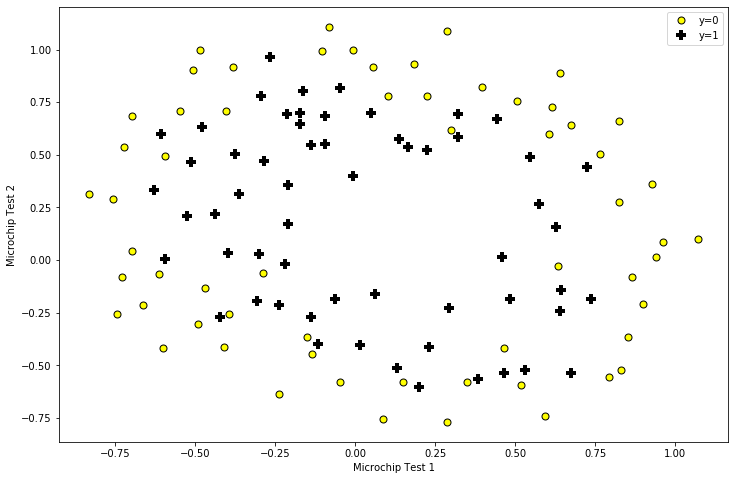

In [31]:
plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'y=0')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'y=1')
plt.legend()
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2');

## =========== Part 1: Regularized Logistic Regression ============
  In this part, you are given a dataset with data points that are not
  linearly separable. However, you would still like to use logistic
  regression to classify the data points.

  To do so, you introduce more features to use -- in particular, you add
  polynomial features to our data matrix (similar to polynomial
  regression).


 Add Polynomial Features

 Note that mapFeature also adds a column of ones for us, so the intercept
 term is handled

In [32]:
def mapfeature(x1,x2):
    ''' MAPFEATURE Feature mapping function to polynomial features

   MAPFEATURE(X1, X2) maps the two input features
   to quadratic features used in the regularization exercise.

   Returns a new feature array with more features, comprising of 
   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

   Inputs X1, X2 must be the same size '''
    x1.shape = (x1.size,1)
    x2.shape = (x2.size,1) 

    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))
    for i in range(1,degree+1): 
        for j in range(i+1):
            r = (x1**(i-j))*(x2**j)
            out = np.hstack((out,r))
    return out

def costFunctionReg(theta, X, y, lambda_val):
    '''COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters. 
    '''
    m = len(y)
    grad = np.zeros((len(theta),1))
    theta = theta.reshape(len(theta),1)
    H = sigmoid(X@theta)
    J =  (-1/m)*((y.transpose()@np.log(H))+((1-y.transpose())@np.log(1-H))) + \
    (lambda_val/(2*m))*np.sum(theta[1:]**2)
    D = H - y
    grad[0] = (1/m)*X[:,:1].transpose()@D
    grad[1:] = (lambda_val/(m))*theta[1:] + (1/m)*X[:,1:].transpose()@D
    return J.item(), grad

In [84]:
X_init = mapfeature(X[:,0],X[:,1])

In [34]:
# Initialize fitting parameters
m, n = X_init.shape
initial_theta = np.zeros((n, 1))
# Set regularization parameter lambda to 1
lambda_val = 1

In [35]:
cost, grad = costFunctionReg(initial_theta, X_init, y, lambda_val)

In [36]:
print('Cost at initial theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
print('{}'.format(grad[:5]))
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [37]:
test_theta = np.ones((n,1))
cost, grad = costFunctionReg(test_theta, X_init, y, 10);

In [38]:
print('Cost at test theta (with lambda = 10): {}'.format(cost))
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
print('{}'.format(grad[:5]))
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at test theta (with lambda = 10): 3.16450933161501
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



## ============= Part 2: Regularization and Accuracies =============
 Optional Exercise:
  In this part, you will get to try different values of lambda and
  see how regularization affects the decision coundart

  Try the following values of lambda (0, 1, 10, 100).

  How does the decision boundary change when you vary lambda? How does
  the training set accuracy vary?

In [39]:
def func_reg(theta, X, y,lambda_val):
    theta = theta.reshape(len(theta),1)
    cost, _ = costFunctionReg(theta,X, y,lambda_val)
    return cost

def funcprime_reg(theta, X, y,lambda_val):
    theta = theta.reshape(len(theta),1)
    #print(theta.shape)
    _, grad = costFunctionReg(theta,X, y,lambda_val)
    return grad.flatten()

In [40]:
initial_theta = np.ones((n,1))
lambda_val = 100

In [41]:
theta_results = opt.fmin_bfgs(func_reg, initial_theta,fprime=funcprime_reg, args=(X_init, y,lambda_val),\
                              full_output=True, maxiter=400)
theta_min = theta_results[0]
cost = theta_results[1]

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10


In [42]:
#Here is the grid range
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i,k in enumerate(u):
    for j,l in enumerate(v): 
        z[i,j] = mapfeature(np.array(k),np.array(l))@theta_min.reshape(len(theta_min),1)
z = z.transpose();

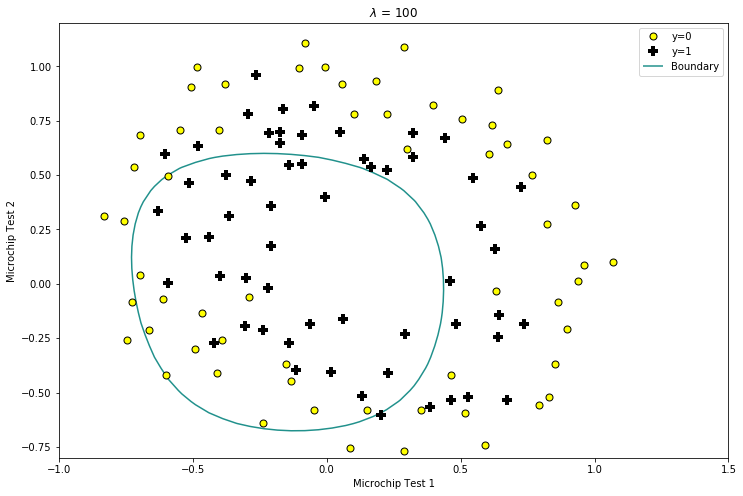

In [43]:
plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'y=0')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'y=1')
# Plot z = 0
# Notice you need to specify the range [0, 0]
CS = plt.contour(u, v, z,0)
CS.collections[1].set_label("Boundary")
plt.legend()
plt.ylim(-0.8,1.2)
plt.xlim(-1,1.5)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2');
plt.title('$\lambda$ = {}'.format(lambda_val));


In [44]:
# Compute accuracy on our training set
p = predict(theta_min.reshape(len(theta_min),1), X_init);

print('Train Accuracy: {}'.format(np.mean((p== y) * 100)))
print('Expected accuracy (approx for lambda=100): 61.01')

Train Accuracy: 61.016949152542374
Expected accuracy (approx for lambda=100): 61.01


Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26


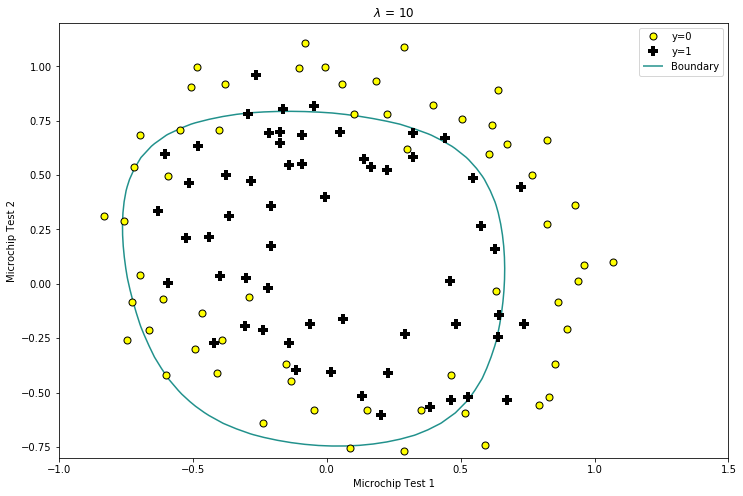

In [45]:
initial_theta = np.ones((n,1))
lambda_val = 10

theta_results = opt.fmin_bfgs(func_reg, initial_theta,fprime=funcprime_reg, args=(X_init, y,lambda_val),\
                              full_output=True, maxiter=400)
theta_min = theta_results[0]
cost = theta_results[1]

plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'y=0')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'y=1')
# Plot z = 0
# Notice you need to specify the range [0, 0]
#Here is the grid range
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i,k in enumerate(u):
    for j,l in enumerate(v): 
        z[i,j] = mapfeature(np.array(k),np.array(l))@theta_min.reshape(len(theta_min),1)
z = z.transpose();
CS = plt.contour(u, v, z,0)
CS.collections[1].set_label("Boundary")
plt.legend()
plt.ylim(-0.8,1.2)
plt.xlim(-1,1.5)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('$\lambda$ = {}'.format(lambda_val));

In [46]:
# Compute accuracy on our training set
p = predict(theta_min.reshape(len(theta_min),1), X_init);

print('Train Accuracy: {}'.format(np.mean((p== y) * 100)))
print('Expected accuracy (approx for lambda=10): 74.576')

Train Accuracy: 74.57627118644068
Expected accuracy (approx for lambda=10): 74.576


Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 55
         Function evaluations: 57
         Gradient evaluations: 57


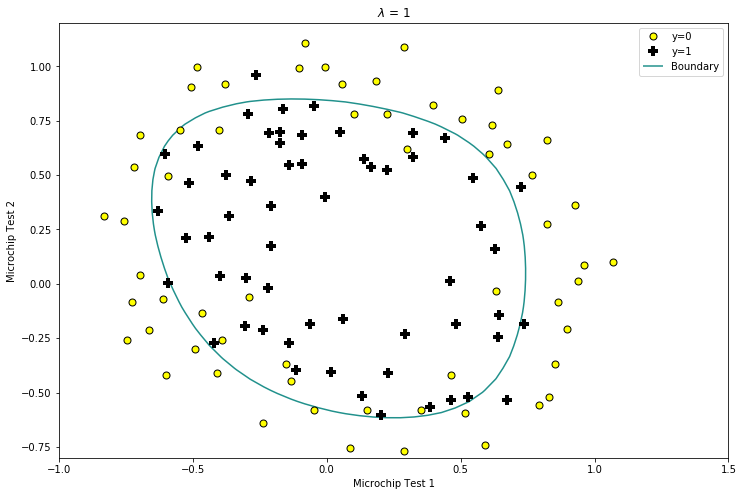

In [47]:
initial_theta = np.ones((n,1))
lambda_val = 1

theta_results = opt.fmin_bfgs(func_reg, initial_theta,fprime=funcprime_reg, args=(X_init, y,lambda_val),\
                              full_output=True, maxiter=400)
theta_min = theta_results[0]
cost = theta_results[1]

plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'y=0')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'y=1')
# Plot z = 0
# Notice you need to specify the range [0, 0]
#Here is the grid range
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i,k in enumerate(u):
    for j,l in enumerate(v): 
        z[i,j] = mapfeature(np.array(k),np.array(l))@theta_min.reshape(len(theta_min),1)
z = z.transpose();
CS = plt.contour(u, v, z,0)
CS.collections[1].set_label("Boundary")
plt.legend()
plt.ylim(-0.8,1.2)
plt.xlim(-1,1.5)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('$\lambda$ = {}'.format(lambda_val));

In [48]:
# Compute accuracy on our training set
p = predict(theta_min.reshape(len(theta_min),1), X_init);

print('Train Accuracy: {}'.format(np.mean((p== y) * 100)))
print('Expected accuracy (approx for lambda=1): 83.1')

Train Accuracy: 83.05084745762711
Expected accuracy (approx for lambda=1): 83.1


## Extra: Using sklearn kit

In [161]:
def mapfeature2(x1,x2):
    ''' MAPFEATURE Feature mapping function to polynomial features

   MAPFEATURE(X1, X2) maps the two input features
   to quadratic features used in the regularization exercise.

   Returns a new feature array with more features, comprising of 
   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

   Inputs X1, X2 must be the same size '''
    x1.shape = (x1.size,1)
    x2.shape = (x2.size,1) 

    degree = 2
    out = np.empty(shape=(x1[:, 0].size, 1))
    for i in range(1,degree+1): 
        for j in range(i+1):
            r = (x1**(i-j))*(x2**j)
            out = np.hstack((out,r))
    return out

In [166]:
X_init2 = X_init[:,1:]

In [168]:
#The if you end with lower number of dimensions the bias unit is in the intercept, 
# if you end with a complete number of dimensions, you would need to add the value of the intercept to the 0 element
# of the vector
clf_LR = LogisticRegression(C=1, penalty='l2',tol=1e-5,solver="lbfgs",verbose=1)

In [169]:
clf_LR.fit(X_init2,np.ravel(y))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=1,
                   warm_start=False)

In [178]:
theta_min_sklearn = np.append(clf_LR.intercept_,clf_LR.coef_)

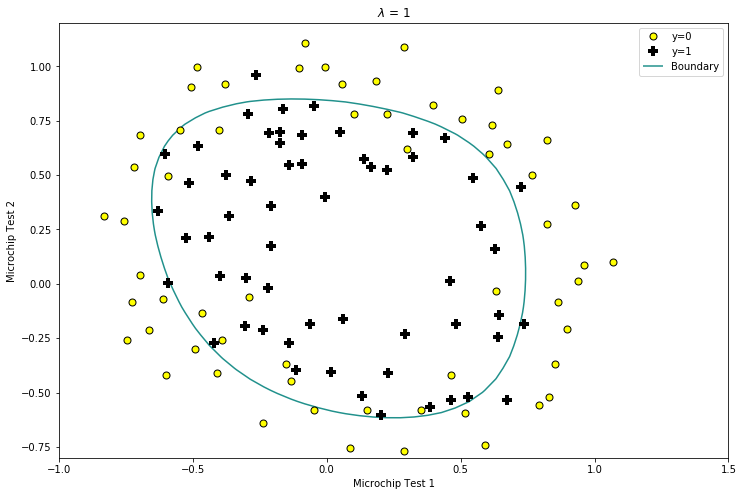

In [179]:
plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'y=0')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'y=1')
# Plot z = 0
# Notice you need to specify the range [0, 0]
#Here is the grid range
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i,k in enumerate(u):
    for j,l in enumerate(v): 
        z[i,j] = mapfeature(np.array(k),np.array(l))@theta_min_sklearn.reshape(len(theta_min_sklearn),1)
z = z.transpose();
CS = plt.contour(u, v, z,0)
CS.collections[1].set_label("Boundary")
plt.legend()
plt.ylim(-0.8,1.2)
plt.xlim(-1,1.5)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('$\lambda$ = {}'.format(lambda_val));

In [181]:
# Compute accuracy on our training set
p = clf_LR.score(X_init2,y)

print('Train Accuracy: {}'.format(p* 100))
print('Expected accuracy (approx for lambda=1): 83.1')

Train Accuracy: 83.05084745762711
Expected accuracy (approx for lambda=1): 83.1


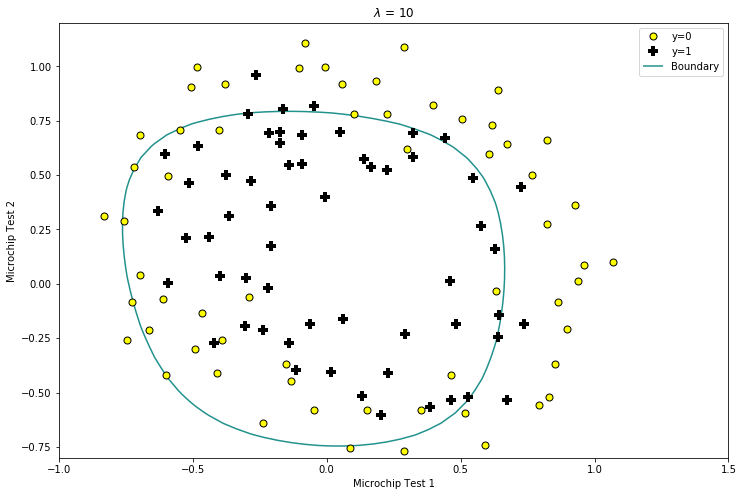

In [183]:
lambda_val = 10
clf_LR = LogisticRegression(C=1/lambda_val, penalty='l2',tol=1e-5,solver="lbfgs")
clf_LR.fit(X_init2,np.ravel(y))
theta_min_sklearn = np.append(clf_LR.intercept_,clf_LR.coef_)
plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'y=0')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'y=1')
# Plot z = 0
# Notice you need to specify the range [0, 0]
#Here is the grid range
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i,k in enumerate(u):
    for j,l in enumerate(v): 
        z[i,j] = mapfeature(np.array(k),np.array(l))@theta_min_sklearn.reshape(len(theta_min_sklearn),1)
z = z.transpose();
CS = plt.contour(u, v, z,0)
CS.collections[1].set_label("Boundary")
plt.legend()
plt.ylim(-0.8,1.2)
plt.xlim(-1,1.5)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('$\lambda$ = {}'.format(lambda_val));

In [184]:
# Compute accuracy on our training set
p = clf_LR.score(X_init2,y)

print('Train Accuracy: {}'.format(p* 100))
print('Expected accuracy (approx for lambda=1): 74.576')

Train Accuracy: 74.57627118644068
Expected accuracy (approx for lambda=1): 83.1


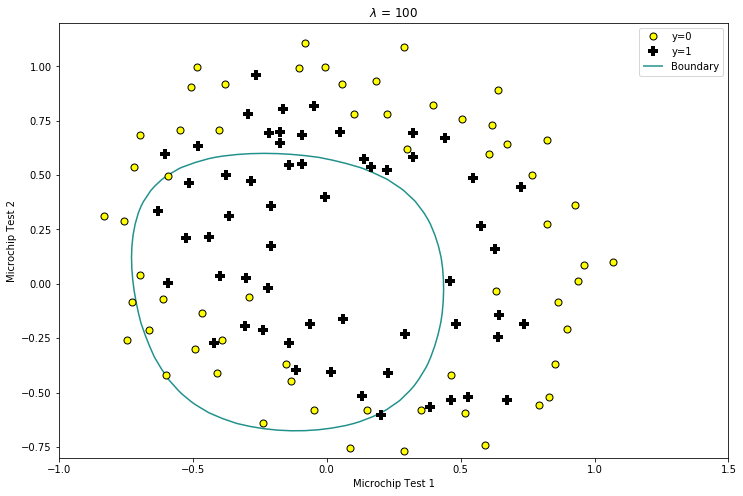

In [185]:
lambda_val = 100
clf_LR = LogisticRegression(C=1/lambda_val, penalty='l2',tol=1e-5,solver="lbfgs")
clf_LR.fit(X_init2,np.ravel(y))
theta_min_sklearn = np.append(clf_LR.intercept_,clf_LR.coef_)
plt.figure(figsize=(12,8))
indices_0 = np.where(y==0)[0]
indices_1 = np.where(y==1)[0]
plt.plot(X[indices_0,0],X[indices_0,1],'ko',markerfacecolor='yellow', markersize=7, label = 'y=0')
plt.plot(X[indices_1,0],X[indices_1,1],'k+',linewidth=2,markeredgewidth=4,markersize=10, label = 'y=1')
# Plot z = 0
# Notice you need to specify the range [0, 0]
#Here is the grid range
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i,k in enumerate(u):
    for j,l in enumerate(v): 
        z[i,j] = mapfeature(np.array(k),np.array(l))@theta_min_sklearn.reshape(len(theta_min_sklearn),1)
z = z.transpose();
CS = plt.contour(u, v, z,0)
CS.collections[1].set_label("Boundary")
plt.legend()
plt.ylim(-0.8,1.2)
plt.xlim(-1,1.5)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('$\lambda$ = {}'.format(lambda_val));

In [187]:
# Compute accuracy on our training set
p = clf_LR.score(X_init2,y)

print('Train Accuracy: {}'.format(p* 100))
print('Expected accuracy (approx for lambda=1): 61.01')

Train Accuracy: 61.016949152542374
Expected accuracy (approx for lambda=1): 61.01
